In [1]:
!pip install dlib
!pip install face_recognition
!pip install imutils
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# USAGE
# python encode_faces.py --dataset dataset --encodings encodings.pickle

# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
import imutils
import timeit

def encode_faces(args):
  time_start = timeit.default_timer()

  imagePaths = list(paths.list_images(args["dataset"]))
  # initialize the list of known encodings and known names
  knownEncodings = []
  knownNames = []

  # loop over the image paths
  for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    name = imagePath.split(os.path.sep)[-2]
    # load the input image and convert it from RGB (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    resize_start_time = timeit.default_timer()
    image = imutils.resize(image, width=600)
    resize_end_time = timeit.default_timer() - resize_start_time
    time_start = time_start + resize_end_time
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # detect the (x, y)-coordinates of the bounding boxes
    # corresponding to each face in the input image
    boxes = face_recognition.face_locations(rgb,
      model=args["detection_method"])

    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)

    # loop over the encodings
    for encoding in encodings:
      # add each encoding + name to our set of known names and
      # encodings
      knownEncodings.append(encoding)
      knownNames.append(name)


  # dump the facial encodings + names to disk
  print("[INFO] serializing encodings...")
  data = {"encodings": knownEncodings, "names": knownNames}
  f = open(args["encodings"], "wb")
  f.write(pickle.dumps(data))
  f.close()
  learn_time = timeit.default_timer() - time_start
  print(f'Learning time is: {learn_time}')

In [0]:
args = {
    'dataset': '/content/drive/My Drive/AI/PADM/dataset',
    'encodings': '/content/drive/My Drive/AI/PADM/encodings.pickle',
    'detection_method': 'hog'
}

In [4]:
encode_faces(args)

[INFO] serializing encodings...
Learning time is: 22.064662522998333


In [0]:
# USAGE
# python recognize_faces_image.py --encodings encodings.pickle --image examples/example_01.png 

# import the necessary packages
import face_recognition
from google.colab.patches import cv2_imshow
import argparse
import pickle
import cv2


def recognize_faces_image(args):

  # load the known faces and embeddings
  print("[INFO] loading encodings...")
  data = pickle.loads(open(args["encodings"], "rb").read())

  # load the input image and convert it from BGR to RGB
  image = cv2.imread(args["image"])
  image = imutils.resize(image, width=600)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # detect the (x, y)-coordinates of the bounding boxes corresponding
  # to each face in the input image, then compute the facial embeddings
  # for each face
  print("[INFO] recognizing faces...")
  boxes = face_recognition.face_locations(rgb,
    model=args["detection_method"])
  encodings = face_recognition.face_encodings(rgb, boxes)

  # initialize the list of names for each face detected
  names = []

  # loop over the facial embeddings
  for encoding in encodings:
    # attempt to match each face in the input image to our known
    # encodings
    matches = face_recognition.compare_faces(data["encodings"],
      encoding)
    name = "Unknown"

    # check to see if we have found a match
    if True in matches:
      # find the indexes of all matched faces then initialize a
      # dictionary to count the total number of times each face
      # was matched
      matchedIdxs = [i for (i, b) in enumerate(matches) if b]
      counts = {}

      # loop over the matched indexes and maintain a count for
      # each recognized face face
      for i in matchedIdxs:
        name = data["names"][i]
        counts[name] = counts.get(name, 0) + 1

      # determine the recognized face with the largest number of
      # votes (note: in the event of an unlikely tie Python will
      # select first entry in the dictionary)
      name = max(counts, key=counts.get)
    
    # update the list of names
    names.append(name)

  # loop over the recognized faces
  for ((top, right, bottom, left), name) in zip(boxes, names):
    # draw the predicted face name on the image
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
      0.75, (0, 255, 0), 2)

  # show the output image
  cv2_imshow(image)
  cv2.waitKey(0)

In [0]:
args_rec_face_image = {
    'encodings': '/content/drive/My Drive/AI/PADM/encodings.pickle',
    'image': '/content/drive/My Drive/AI/PADM/examples/100867215_850624292126617_471195725263273984_n.jpg',
    'detection_method': 'cnn'
}

[INFO] loading encodings...
[INFO] recognizing faces...


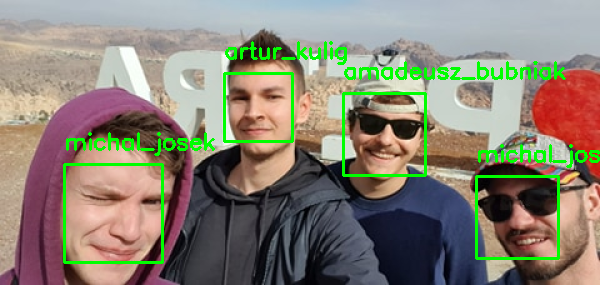

Prediction time: 0.1900468230005572


In [7]:
prediction_time_start = timeit.default_timer()
recognize_faces_image(args_rec_face_image)
print(f'Prediction time: {timeit.default_timer() - prediction_time_start}')

[INFO] loading encodings...
[INFO] recognizing faces...


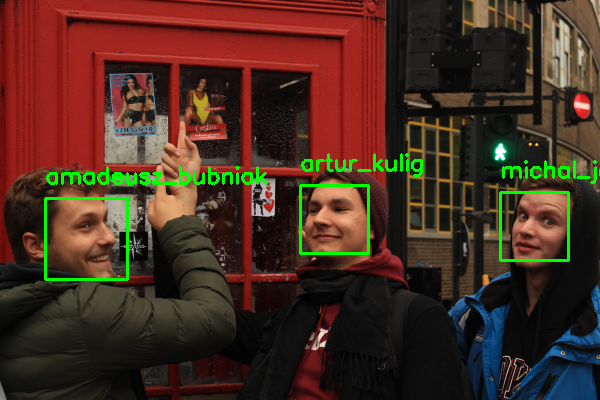

Prediction time: 0.6638238700006696


In [8]:
args_rec_face_image = {
    'encodings': '/content/drive/My Drive/AI/PADM/encodings.pickle',
    'image': '/content/drive/My Drive/AI/PADM/examples/IMG_3919.JPG',
    'detection_method': 'cnn'
}
prediction_time_start = timeit.default_timer()
recognize_faces_image(args_rec_face_image)
print(f'Prediction time: {timeit.default_timer() - prediction_time_start}')

[INFO] loading encodings...
[INFO] recognizing faces...


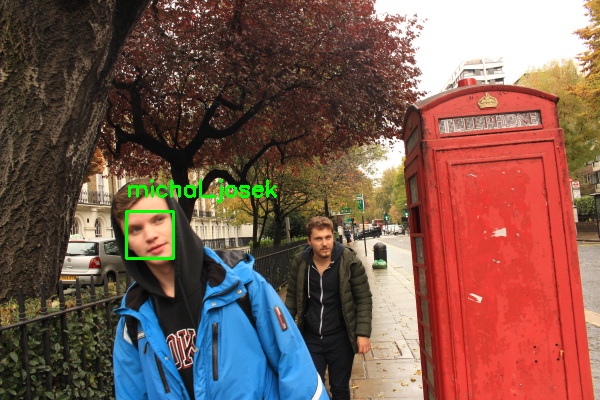

Prediction time: 0.592287474000841


In [9]:
args_rec_face_image = {
    'encodings': '/content/drive/My Drive/AI/PADM/encodings.pickle',
    'image': '/content/drive/My Drive/AI/PADM/examples/IMG_3933.JPG',
    'detection_method': 'cnn'
}
prediction_time_start = timeit.default_timer()
recognize_faces_image(args_rec_face_image)
print(f'Prediction time: {timeit.default_timer() - prediction_time_start}')

[INFO] loading encodings...
[INFO] recognizing faces...


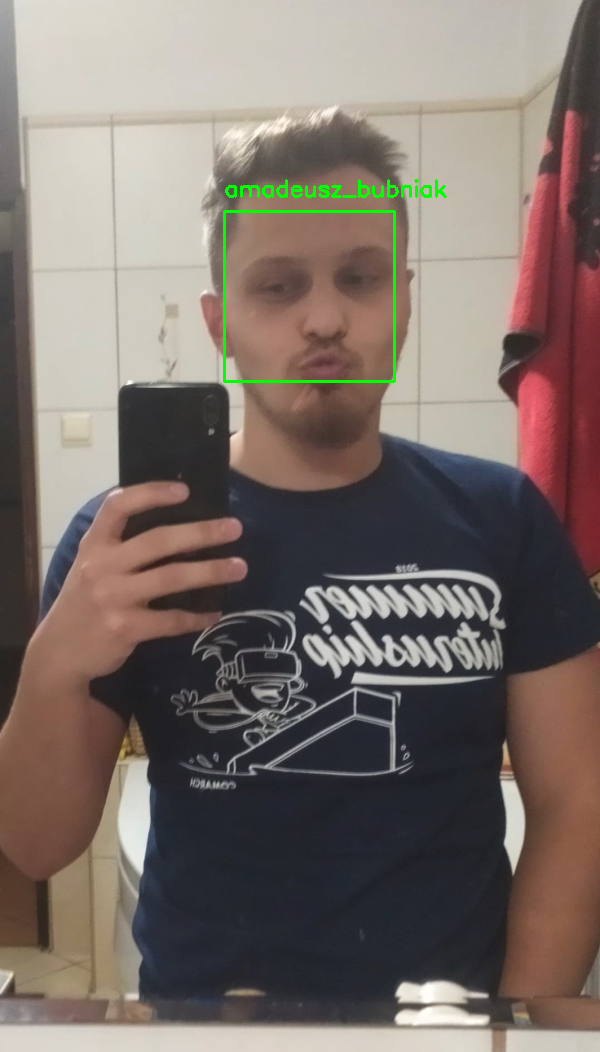

Prediction time: 0.6070358520000809


In [10]:
args_rec_face_image = {
    'encodings': '/content/drive/My Drive/AI/PADM/encodings.pickle',
    'image': '/content/drive/My Drive/AI/PADM/examples/bubniak.png',
    'detection_method': 'cnn'
}
prediction_time_start = timeit.default_timer()
recognize_faces_image(args_rec_face_image)
print(f'Prediction time: {timeit.default_timer() - prediction_time_start}')

[INFO] loading encodings...
[INFO] recognizing faces...


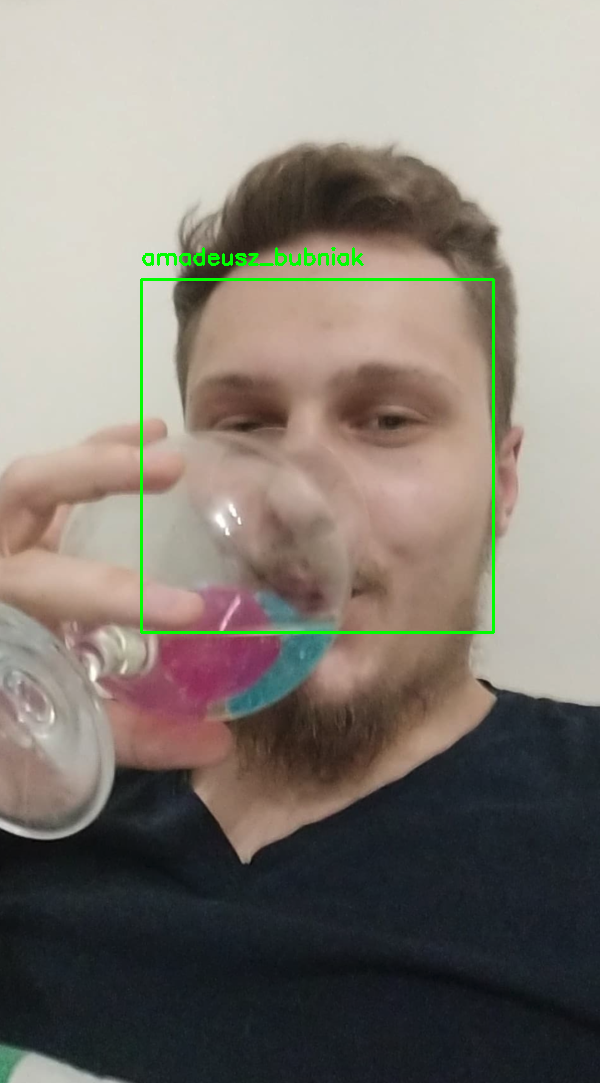

Prediction time: 0.7211426140002004


In [11]:
args_rec_face_image = {
    'encodings': '/content/drive/My Drive/AI/PADM/encodings.pickle',
    'image': '/content/drive/My Drive/AI/PADM/examples/bubniak2.png',
    'detection_method': 'cnn'
}
prediction_time_start = timeit.default_timer()
recognize_faces_image(args_rec_face_image)
print(f'Prediction time: {timeit.default_timer() - prediction_time_start}')

[INFO] loading encodings...
[INFO] recognizing faces...


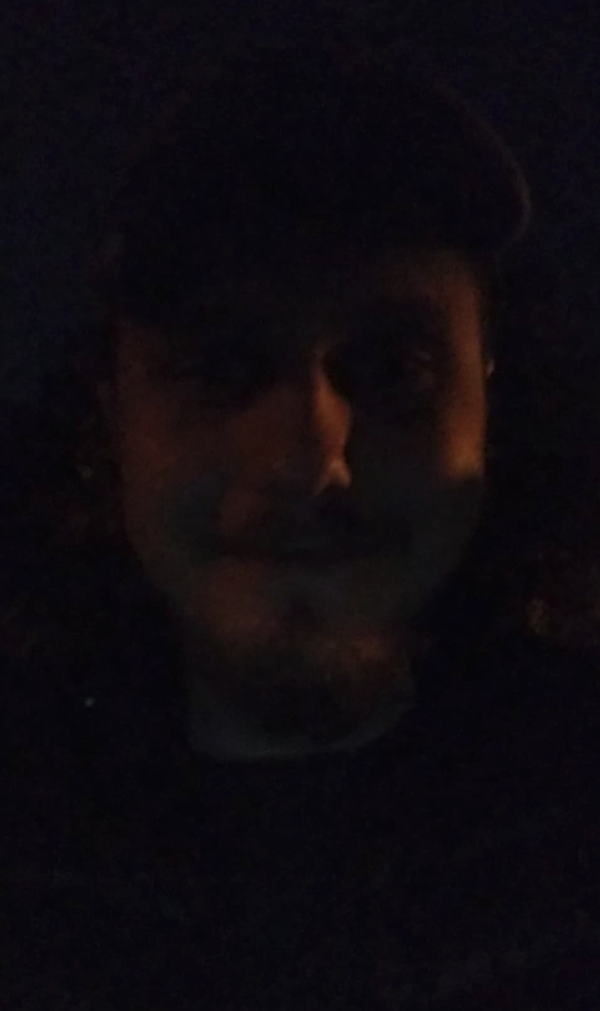

Prediction time: 0.3368419050002558


In [12]:
args_rec_face_image = {
    'encodings': '/content/drive/My Drive/AI/PADM/encodings.pickle',
    'image': '/content/drive/My Drive/AI/PADM/examples/bubniak3.png',
    'detection_method': 'cnn'
}
prediction_time_start = timeit.default_timer()
recognize_faces_image(args_rec_face_image)
print(f'Prediction time: {timeit.default_timer() - prediction_time_start}')